In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('dataset.csv', index_col = "DATE")
data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,AWND,FMTM,PGTM,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,city,state,region,th_power,power
DATE,,,,,,,,,,,,,,,,,,,,
2010-01-01,USW00014942,"OMAHA EPPLEY AIRFIELD, NE US",41.31186,-95.90186,298.8,3.800000,1311.000000,1159.000000,11.426918,-11.100000,-23.300000,350.000000,330.000000,8.000000,10.300000,Des Moines,IA,Midwest Region,105682.164827,0
2010-01-02,USW00014942,"OMAHA EPPLEY AIRFIELD, NE US",41.31186,-95.90186,298.8,1.700000,222.000000,1950.000000,11.426918,-16.700000,-25.600000,10.000000,30.000000,5.400000,7.200000,Des Moines,IA,Midwest Region,9462.320961,0
2010-01-03,USW00014942,"OMAHA EPPLEY AIRFIELD, NE US",41.31186,-95.90186,298.8,2.400000,1547.000000,1558.000000,11.426918,-13.300000,-20.600000,10.000000,20.000000,5.400000,5.800000,Des Moines,IA,Midwest Region,26624.694682,0
2010-01-04,USW00014942,"OMAHA EPPLEY AIRFIELD, NE US",41.31186,-95.90186,298.8,2.700000,1606.000000,1605.000000,11.426918,-15.600000,-28.900000,10.000000,10.000000,4.000000,4.500000,Des Moines,IA,Midwest Region,37908.989107,0
2010-01-05,USW00014942,"OMAHA EPPLEY AIRFIELD, NE US",41.31186,-95.90186,298.8,1.300000,2219.000000,2221.000000,11.426918,-13.300000,-26.700000,150.000000,140.000000,3.600000,4.000000,Des Moines,IA,Midwest Region,4231.369663,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-03,USW00013881,"CHARLOTTE DOUGLAS AIRPORT, NC US",35.22254,-80.95433,222.6,4.300000,1836.559043,1424.130094,14.700000,21.100000,8.900000,310.000000,270.000000,10.700000,15.700000,Charleston,SC,Coastal Areas,153128.587967,0
2023-05-04,USW00013881,"CHARLOTTE DOUGLAS AIRPORT, NC US",35.22254,-80.95433,222.6,2.600000,1836.559043,1424.130094,14.800000,22.800000,6.700000,270.000000,10.000000,5.800000,8.100000,Charleston,SC,Coastal Areas,33850.957301,0
2023-05-05,USW00013881,"CHARLOTTE DOUGLAS AIRPORT, NC US",35.22254,-80.95433,222.6,2.500000,1836.559043,1424.130094,17.200000,23.900000,11.700000,220.000000,230.000000,5.400000,6.300000,Charleston,SC,Coastal Areas,30093.377778,0


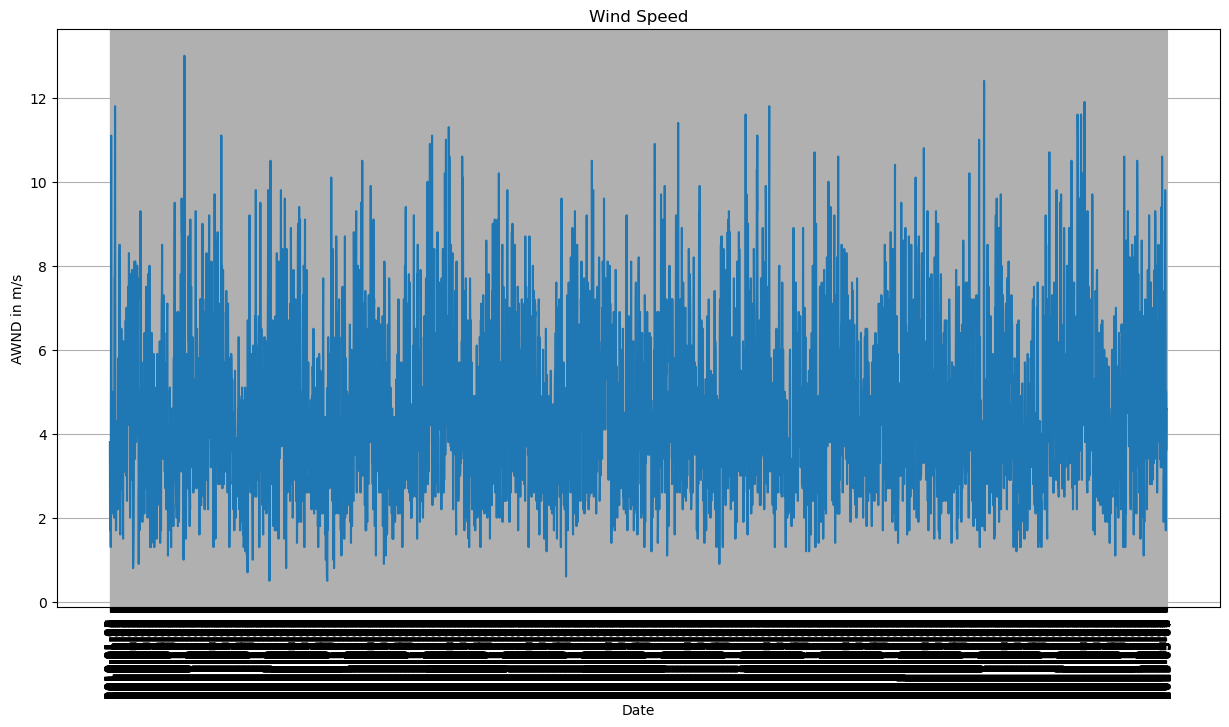

In [3]:
temp_df = data[data['STATION'].isin({'USW00014942'})]
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(temp_df.index, temp_df['AWND'])
plt.title('Wind Speed')
plt.ylabel('AWND in m/s')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

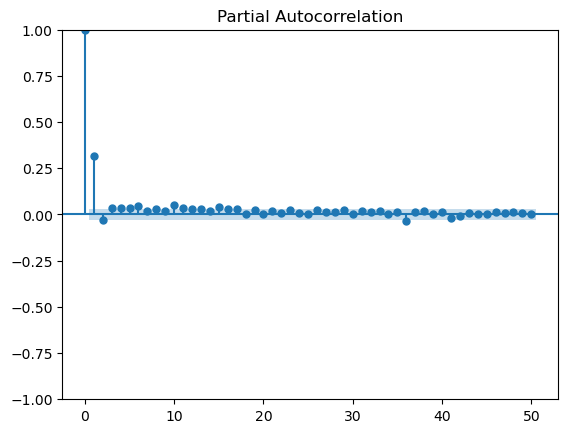

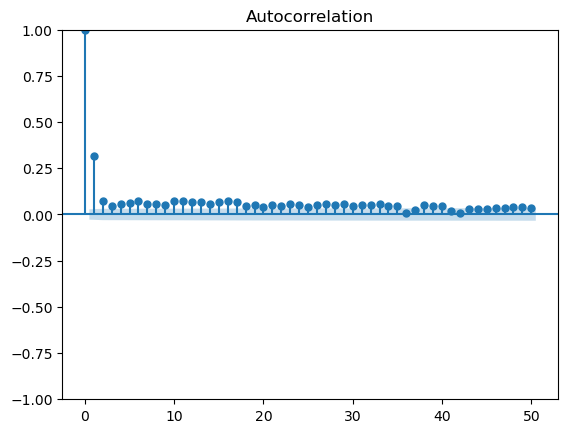

In [4]:
plot_pacf(temp_df['AWND'], lags=50);
plot_acf(temp_df['AWND'], lags=50);

In [5]:

def adfuller_test(windSpeed):
    result=adfuller(windSpeed)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [6]:
adfuller_test(temp_df['AWND'])

ADF Test Statistic : -12.214725745922717
p-value : 1.1424929570608886e-22
#Lags Used : 16
Number of Observations Used : 4858
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


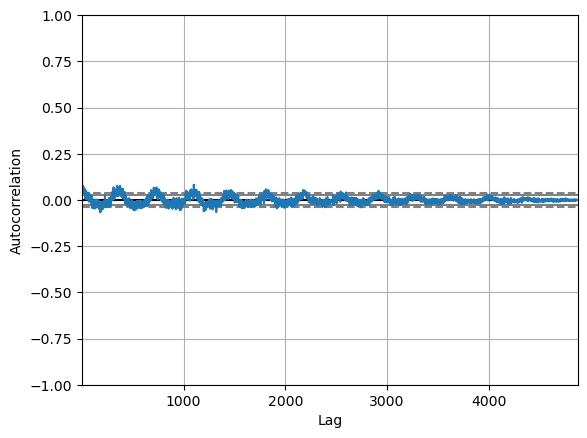

In [7]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(temp_df['AWND'])
plt.show()

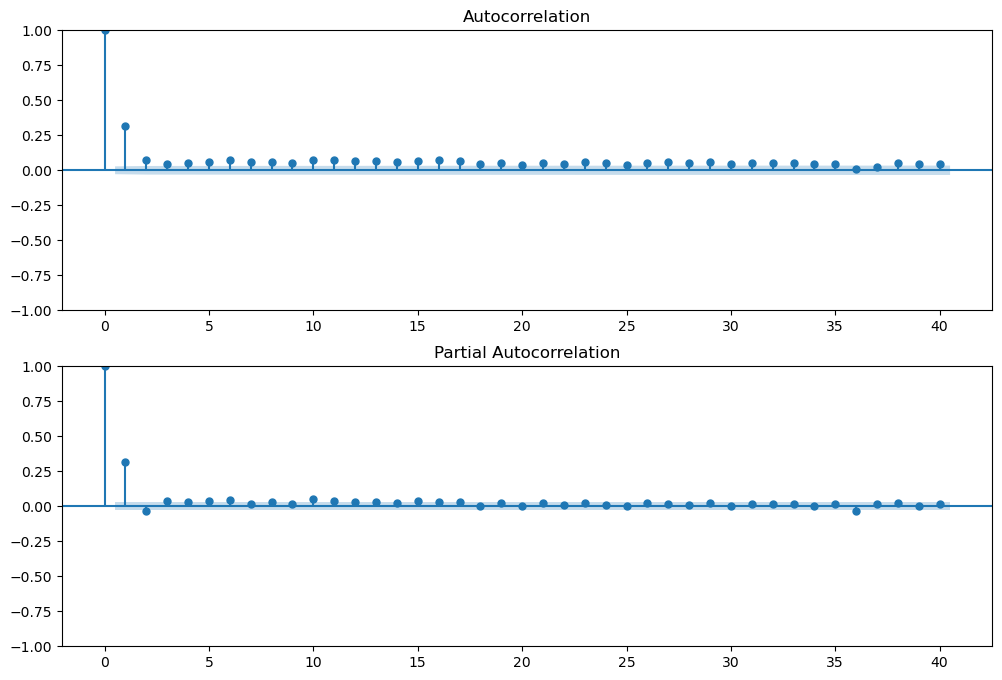

In [8]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(temp_df['AWND'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(temp_df['AWND'],lags=40,ax=ax2)

In [9]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(temp_df['AWND'],order=(1,0,2))
model_fit=model.fit()
model_fit.summary()
# type(model_fit)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   AWND   No. Observations:                 4875
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -9780.511
Date:                Tue, 09 May 2023   AIC                          19571.022
Time:                        23:45:10   BIC                          19603.482
Sample:                    01-01-2010   HQIC                         19582.413
                         - 05-07-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5879      0.090     50.876      0.000       4.411       4.765
ar.L1          0.9796      0.007    140.602      0.000       0.966       0.993
ma.L1         -0.6704      0.015    -44.204      0.000      -0.700      -0.641
ma.L2         -0.2654      0.014    -18.937      0.000      -0.293      -0.238
sigma2         3.2367      0.067     48.083      0.000       3.105       3.369
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               344.46
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.63
Prob(H) (two-sided):                  0.95   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# temp_df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
# temp_df[['AWND','forecast']].plot(figsize=(12,8))

In [11]:
mape = np.mean(np.abs((temp_df['AWND'] - temp_df['forecast']) / temp_df['AWND'].mean()))*100

KeyError: 'forecast'

In [ ]:
mape


In [ ]:
temp_df